# Predict Stock Price From Historical Data
## Compare between Simple RNN and LSTM
---
**Team Members**

Kongphop Wichaidit 64011731

Dechathon Niamsa-ard 64110094

Rujisaran Malan 64110111

### 1. Import necessary libraries

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import mplfinance as mpf
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import SimpleRNN

### 2. Create a training set and testing set

2.1 Training set

In [3]:
stock_data1 = yf.download('AAPL', start='2015-01-01', end='2020-12-30')
train_data = stock_data1.iloc[:,1:2].values

[*********************100%***********************]  1 of 1 completed


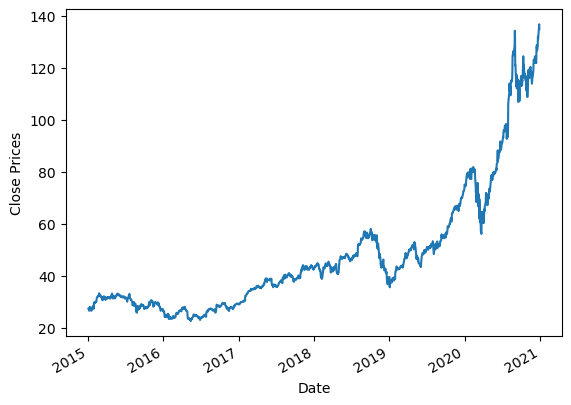

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565697,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873640,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875889,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210684,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140909,237458000


In [4]:
stock_data1['Close'].plot()
plt.ylabel("Close Prices")
plt.show()
stock_data1.head()

In [5]:
#Feature Scaling
sc = MinMaxScaler(feature_range = (0,1))
train_data_scaled = sc.fit_transform(train_data)

In [6]:
#Create a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60,len(stock_data1)):
    X_train.append(train_data_scaled[i-60:i,0])
    y_train.append(train_data_scaled[i,0])
X_train, y_train = np.array(X_train),np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

2.2 Testing set

In [7]:
stock_data2 = yf.download('AAPL', start='2021-01-01', end='2021-12-30')
real_data = stock_data2.iloc[:,1:2].values

[*********************100%***********************]  1 of 1 completed


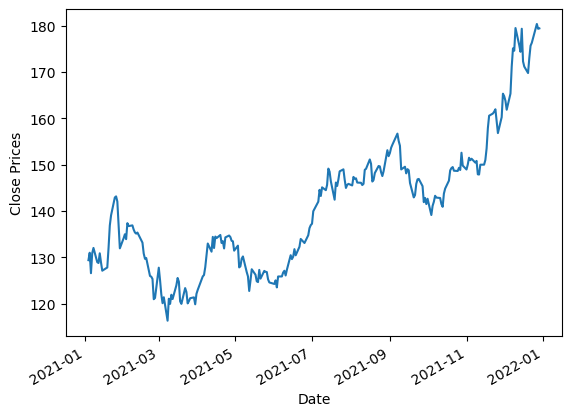

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.680000,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.258591,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.907570,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.169830,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.284698,105158200


In [8]:
stock_data2['Close'].plot()
plt.ylabel("Close Prices")
plt.show()
stock_data2.head()

In [9]:
total_dataset = pd.concat((stock_data1['Open'],stock_data2['Open']), axis = 0)
inputs = total_dataset[len(total_dataset)-len(stock_data2)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,len(stock_data2)+60):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

### 3.Create AI model

3.1 Simple RNN model

In [10]:
#Initializing RNN
rnn_model = Sequential()
#Add LSTM layers and Dropout Regularization
# 1st
rnn_model.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
rnn_model.add(Dropout(0.20))
#2nd
rnn_model.add(SimpleRNN(units = 50, return_sequences = True))
rnn_model.add(Dropout(0.20))
#3rd
rnn_model.add(SimpleRNN(units = 50, return_sequences = True))
rnn_model.add(Dropout(0.20))
#4th
rnn_model.add(SimpleRNN(units = 50))
rnn_model.add(Dropout(0.20))
# Output layer
rnn_model.add(Dense(1))
# Summary the rnn_model
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 60, 50)            2600      
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 60, 50)            5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 60, 50)            5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 50)                5

In [11]:
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, batch_size= 32, epochs=90)

Epoch 1/90
46/46 [==============================] - 36s 690ms/step - loss: 0.3386
Epoch 2/90
46/46 [==============================] - 29s 627ms/step - loss: 0.2035
Epoch 3/90
46/46 [==============================] - 28s 605ms/step - loss: 0.1348
Epoch 4/90
46/46 [==============================] - 27s 582ms/step - loss: 0.0830
Epoch 5/90
46/46 [==============================] - 28s 606ms/step - loss: 0.0666
Epoch 6/90
46/46 [==============================] - 27s 598ms/step - loss: 0.0431
Epoch 7/90
46/46 [==============================] - 27s 583ms/step - loss: 0.0340
Epoch 8/90
46/46 [==============================] - 28s 602ms/step - loss: 0.0299
Epoch 9/90
46/46 [==============================] - 35s 770ms/step - loss: 0.0216
Epoch 10/90
46/46 [==============================] - 31s 678ms/step - loss: 0.0182
Epoch 11/90
46/46 [==============================] - 28s 605ms/step - loss: 0.0149
Epoch 12/90
46/46 [==============================] - 27s 590ms/step - loss: 0.0142
Epoch 13/90
4

3.2 LSTM model

In [20]:
#Initializing RNN
lstm_model = Sequential()
#Add LSTM layers and Dropout Regularization
# 1st
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
lstm_model.add(Dropout(0.20))
#2nd
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.20))
#3rd
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.20))
#4th
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.20))
# Output layer
lstm_model.add(Dense(1))
# Summary the lstm_model
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)               

In [21]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, batch_size= 32, epochs=90)

Epoch 1/90
46/46 [==============================] - 10s 31ms/step - loss: 0.0096
Epoch 2/90
46/46 [==============================] - 1s 27ms/step - loss: 0.0025
Epoch 3/90
46/46 [==============================] - 1s 28ms/step - loss: 0.0022
Epoch 4/90
46/46 [==============================] - 1s 20ms/step - loss: 0.0019
Epoch 5/90
46/46 [==============================] - 1s 23ms/step - loss: 0.0020
Epoch 6/90
46/46 [==============================] - 1s 27ms/step - loss: 0.0016
Epoch 7/90
46/46 [==============================] - 1s 27ms/step - loss: 0.0021
Epoch 8/90
46/46 [==============================] - 1s 22ms/step - loss: 0.0018
Epoch 9/90
46/46 [==============================] - 1s 25ms/step - loss: 0.0020
Epoch 10/90
46/46 [==============================] - 1s 28ms/step - loss: 0.0015
Epoch 11/90
46/46 [==============================] - 1s 25ms/step - loss: 0.0016
Epoch 12/90
46/46 [==============================] - 1s 28ms/step - loss: 0.0014
Epoch 13/90
46/46 [=================

### 4.Make the predictions

In [22]:
# LSTM prediction
lstm_predicted_stock_price = lstm_model.predict(X_test)
lstm_predicted_stock_price = sc.inverse_transform(lstm_predicted_stock_price)
# RNN prediction
rnn_predicted_stock_price = rnn_model.predict(X_test)
rnn_predicted_stock_price = sc.inverse_transform(rnn_predicted_stock_price)

### 5.Evaluation

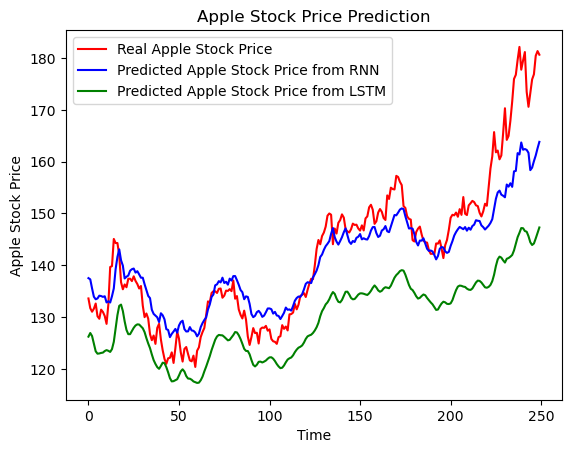

In [23]:
#Visualizing the results
plt.plot(real_data, color = 'red', label = 'Real Apple Stock Price')
plt.plot(rnn_predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price from RNN')
plt.plot(lstm_predicted_stock_price, color = 'green', label = 'Predicted Apple Stock Price from LSTM')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [24]:
print("== RNN model evaluation ==")
print('RNN Mean Absolute Error:', metrics.mean_absolute_error(real_data, rnn_predicted_stock_price))
print('RNN Mean Squared Error:', metrics.mean_squared_error(real_data, rnn_predicted_stock_price))
print('RNN Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(real_data, rnn_predicted_stock_price)))
print("")
print("== LSTM model evaluation ==")
print('LSTM Mean Absolute Error:', metrics.mean_absolute_error(real_data, lstm_predicted_stock_price))
print('LSTM Mean Squared Error:', metrics.mean_squared_error(real_data, lstm_predicted_stock_price))
print('LSTM Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(real_data, lstm_predicted_stock_price)))

== RNN model evaluation ==
RNN Mean Absolute Error: 4.451766265869141
RNN Mean Squared Error: 36.87901907526352
RNN Root Mean Squared Error: 6.072809817149185

== LSTM model evaluation ==
LSTM Mean Absolute Error: 12.161846618652344
LSTM Mean Squared Error: 201.85169342574804
LSTM Root Mean Squared Error: 14.207452038481357


### Add Extra tuning for LSTM model

Better tuning LSTM Model

In [25]:
#Initializing RNN
lstm2 = Sequential()
#Add LSTM layers and Dropout Regularization
# 1st
lstm2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
lstm2.add(Dropout(0.20))
#2nd
lstm2.add(LSTM(units = 50, return_sequences = False))
lstm2.add(Dropout(0.30))
# Output layer
lstm2.add(Dense(1))
# Summary the lstm2
lstm2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [26]:
lstm2.compile(optimizer='adam', loss='mean_squared_error')
lstm2.fit(X_train, y_train, batch_size= 32, epochs=90)

Epoch 1/90
46/46 [==============================] - 6s 22ms/step - loss: 0.0102
Epoch 2/90
46/46 [==============================] - 1s 15ms/step - loss: 0.0019
Epoch 3/90
46/46 [==============================] - 1s 19ms/step - loss: 0.0021
Epoch 4/90
46/46 [==============================] - 1s 18ms/step - loss: 0.0019
Epoch 5/90
46/46 [==============================] - 1s 19ms/step - loss: 0.0018
Epoch 6/90
46/46 [==============================] - 1s 16ms/step - loss: 0.0017
Epoch 7/90
46/46 [==============================] - 1s 16ms/step - loss: 0.0017
Epoch 8/90
46/46 [==============================] - 1s 16ms/step - loss: 0.0017
Epoch 9/90
46/46 [==============================] - 1s 24ms/step - loss: 0.0013
Epoch 10/90
46/46 [==============================] - 1s 16ms/step - loss: 0.0017
Epoch 11/90
46/46 [==============================] - 1s 17ms/step - loss: 0.0013
Epoch 12/90
46/46 [==============================] - 1s 18ms/step - loss: 0.0014
Epoch 13/90
46/46 [==================

In [27]:
# New LSTM prediction
lstm2_predicted_stock_price = lstm2.predict(X_test)
lstm2_predicted_stock_price = sc.inverse_transform(lstm2_predicted_stock_price)

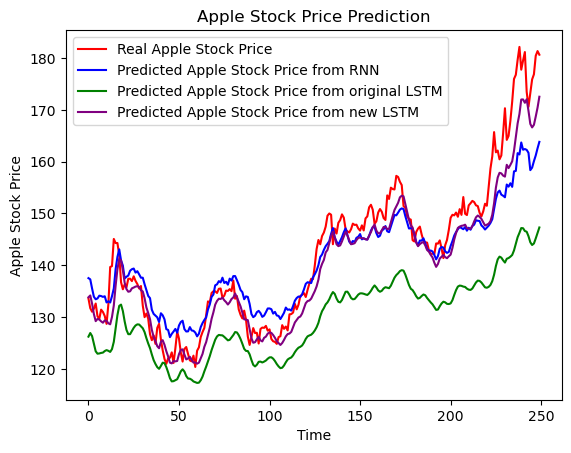

In [28]:
#Visualizing the results
plt.plot(real_data, color = 'red', label = 'Real Apple Stock Price')
plt.plot(rnn_predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price from RNN')
plt.plot(lstm_predicted_stock_price, color = 'green', label = 'Predicted Apple Stock Price from original LSTM')
plt.plot(lstm2_predicted_stock_price, color = 'purple', label = 'Predicted Apple Stock Price from new LSTM')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [29]:
print("== RNN model evaluation ==")
print('RNN Mean Absolute Error:', metrics.mean_absolute_error(real_data, rnn_predicted_stock_price))
print('RNN Mean Squared Error:', metrics.mean_squared_error(real_data, rnn_predicted_stock_price))
print('RNN Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(real_data, rnn_predicted_stock_price)))
print("")
print("== Original LSTM model evaluation ==")
print('Original LSTM Mean Absolute Error:', metrics.mean_absolute_error(real_data, lstm_predicted_stock_price))
print('Original LSTM Mean Squared Error:', metrics.mean_squared_error(real_data, lstm_predicted_stock_price))
print('Original LSTM Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(real_data, lstm_predicted_stock_price)))
print("")
print("== New LSTM model evaluation ==")
print('New LSTM Mean Absolute Error:', metrics.mean_absolute_error(real_data, lstm2_predicted_stock_price))
print('New LSTM Mean Squared Error:', metrics.mean_squared_error(real_data, lstm2_predicted_stock_price))
print('New LSTM Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(real_data, lstm2_predicted_stock_price)))

== RNN model evaluation ==
RNN Mean Absolute Error: 4.451766265869141
RNN Mean Squared Error: 36.87901907526352
RNN Root Mean Squared Error: 6.072809817149185

== Original LSTM model evaluation ==
Original LSTM Mean Absolute Error: 12.161846618652344
Original LSTM Mean Squared Error: 201.85169342574804
Original LSTM Root Mean Squared Error: 14.207452038481357

== New LSTM model evaluation ==
New LSTM Mean Absolute Error: 3.3921944885253907
New LSTM Mean Squared Error: 20.01589381382824
New LSTM Root Mean Squared Error: 4.473912584509026
